# Reinforcement Learning - Sutton and Barto
# Exercise 4.9

Value Iteration

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats

from gamblers import gamblers

# Initialize Environment

In [2]:
env = gamblers(ph=0.25)

## Initialization of the policy

In [3]:
policy_vector = np.full((101), 0)

# Run Scenario

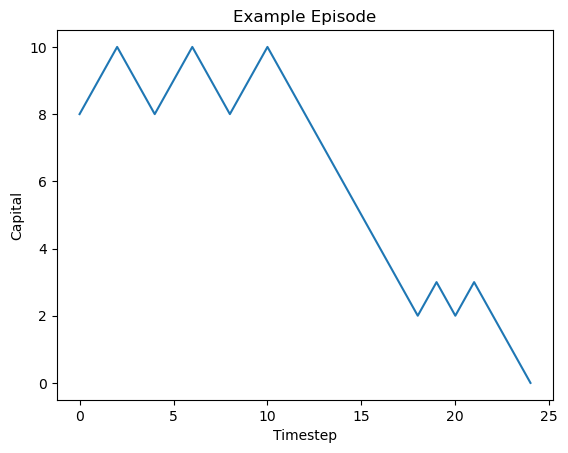

In [4]:
capital = env.reset()

int = 0

min_bet = 1

capitals = []
done = False
while not done:
    bet = max(policy_vector[capital], min_bet)
    capital, reward, done = env.step(bet)
    capitals += [capital]
    #print(f"Bet: {bet}, Capital: {capital}, Reward: {reward}")
    #int += 1
    if int == 1000:
        done = True 

plt.figure()
plt.title("Example Episode")
plt.xlabel("Timestep")
plt.ylabel("Capital")
plt.plot(capitals)

## Implement the Value Iteration algorithm

### Define value table *V(s)* 

In [5]:
state_values = np.zeros(shape=(101))
state_values[0] = 0
state_values[100] = 1

In [6]:
def plot_state_value_curve(state_values):
    plt.figure()
    plt.title("State Values")
    plt.xlabel("State")
    plt.ylabel("Values")
    plt.plot(state_values)

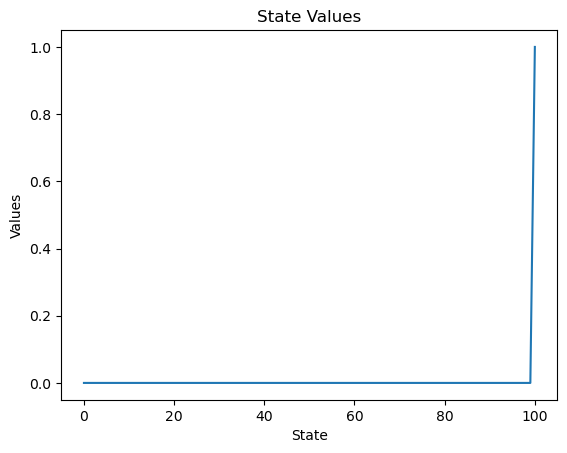

In [7]:
plot_state_value_curve(state_values)

In [8]:
env = gamblers(ph=0.4)

In [9]:
env.reset()

24

In [10]:
matplotlib.rcParams['figure.figsize'] = [10, 5]


def plot_results(value, policy):    
    if value is not None:
        plt.figure()
        plt.title("Value Function")
        plt.xlabel("Capital")
        plt.ylabel("Win Probability")
        plt.bar(range(len(value)), value)

    if policy is not None:
        plt.figure()
        plt.title("Policy")
        plt.xlabel("Capital")
        plt.ylabel("Bet")
        plt.bar(range(len(policy)), policy)

In [11]:
def value_iteration(policy_vector, state_values, theta=1e-25, gamma=1, keep_history=False):
    delta = float("inf")
    
    tolerance = 0.000001
    
    state_value_hist = []
    policy_vector_hist = []
    
    int = 0
        
    while delta > theta:
        delta = 0
        
        for state in range(1, 100):
            
            old_value = state_values[state]
            new_value = 0.
            max_qsa = float("-inf")
                
            max_bet = min(state, 100 - state)
            for action in range(1, max_bet + 1): 
                # expected_return gives the sum of p(s',r|s,a)*[r + gamma*V(s')] for all possible next states and returns
                qsa = env.expected_return(state_values, action, state, gamma)
                #print(f"QSA: {qsa}")
                
                # The tolerance added to max_qsa makes the policy more uniform avoiding the selection of actions
                # whose qsa is higher mainly do to noise, given that in this example there are many possible optimal policies.
                if qsa > max_qsa + tolerance:
                    max_qsa = qsa
                    policy_vector[state] = action
                    
            state_values[state] = max_qsa
            #print(f"Old Value: {old_value}, State Value: {max_qsa}, Action: {policy_vector[state]}")
                
            delta = max(delta, abs(old_value - max_qsa))
        
        
        # plot_results(state_values, policy_vector)
        int += 1
        if keep_history:
            state_value_hist.append(state_values.copy())
            policy_vector_hist.append(policy_vector.copy())
        # print(f"Delta: {delta}")
    print(f"Number of Iterations: {int}")
    return state_value_hist, policy_vector_hist
                    

In [12]:
state_value_hist, policy_vector_hist = value_iteration(policy_vector, state_values, keep_history=True)

Number of Iterations: 33


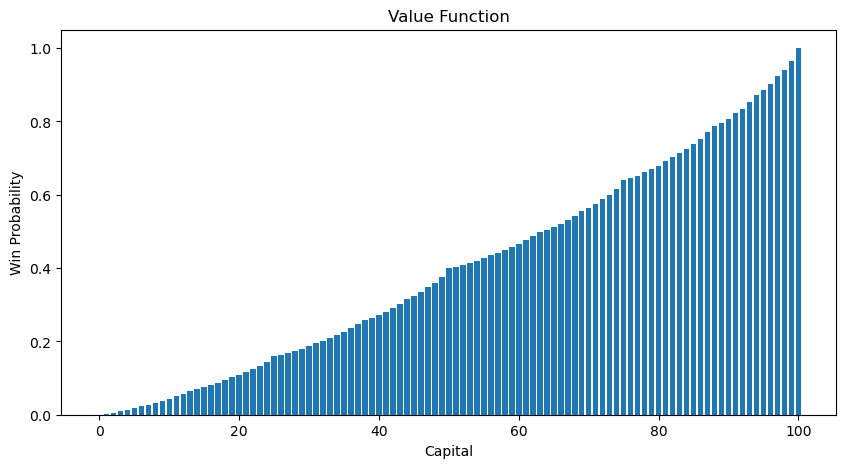

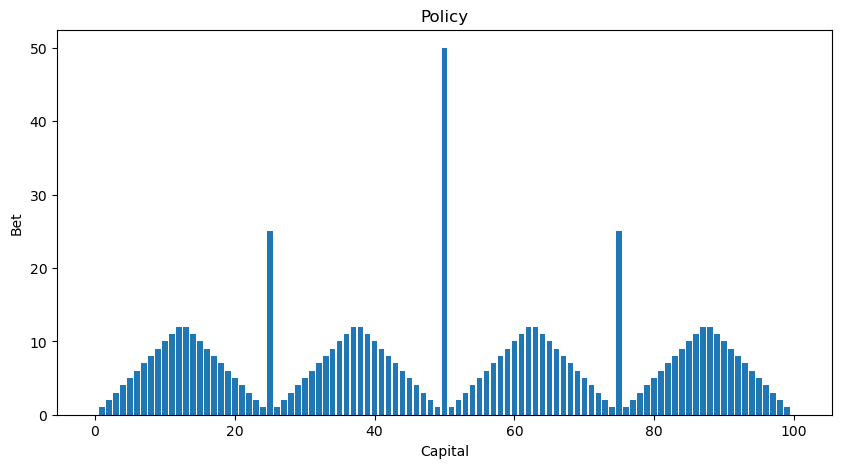

In [13]:
plot_results(state_values, policy_vector)

In [14]:
env = gamblers(ph=0.25)

env.reset

state_values = np.zeros(shape=(101))
state_values[0] = 0
state_values[100] = 1

In [15]:
state_value_hist, policy_vector_hist = value_iteration(policy_vector, state_values, keep_history=True)

Number of Iterations: 29


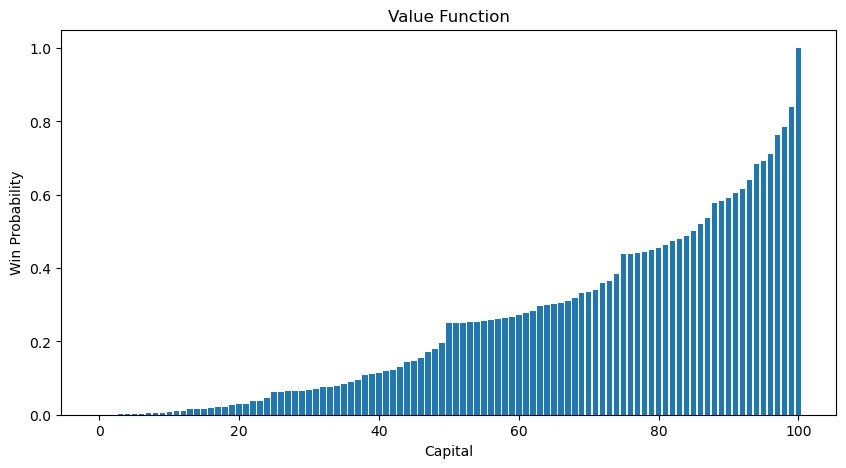

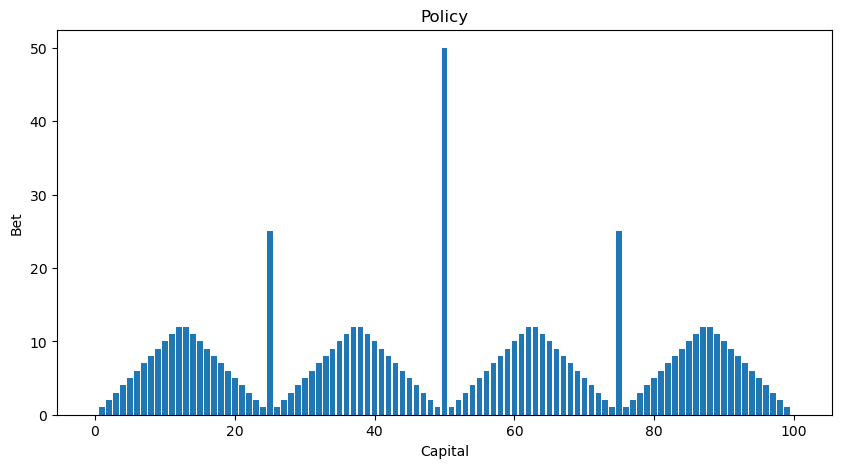

In [16]:
plot_results(state_values, policy_vector)

In [17]:
env = gamblers(ph=0.55)

env.reset

state_values = np.zeros(shape=(101))
state_values[0] = 0
state_values[100] = 1

In [18]:
state_value_hist, policy_vector_hist = value_iteration(policy_vector, state_values, keep_history=True)

Number of Iterations: 3028


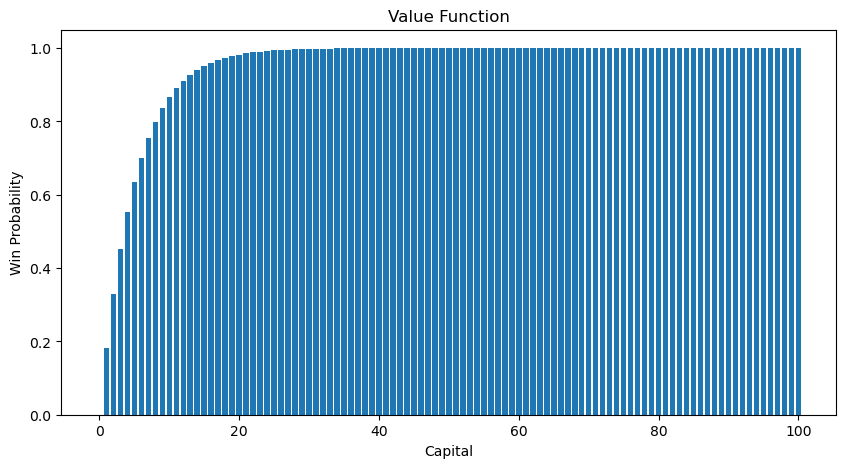

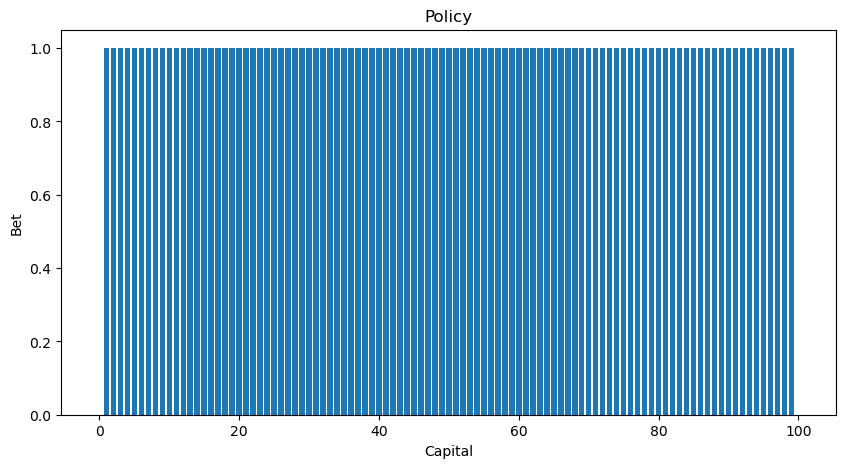

In [19]:
plot_results(state_values, policy_vector)